# Classification Using Naive Bayes and Tree Based Algorithm

# challenge

#  Data Preparation


### Import Data & Python Packages

In [132]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import default_rng
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [133]:
# Read CSV train data file into DataFrame
data_df1=pd.read_csv('/Users/vamseemuppavarapu/Archanaa_NIIT/Naive_Bayes/DS2_C5_S4_HR_Data_challenge.csv')
data_df1.head()
data_df=data_df1

# preview the data


## Task 1 
##Data Exploration and Visualization - Understanding the data

In [134]:
print(data_df.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


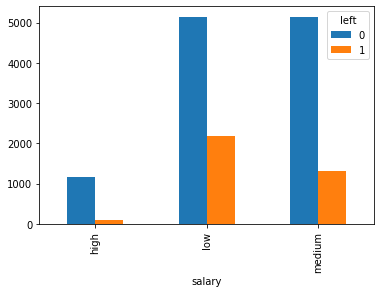

In [135]:
# analyzing the impact of salary in employee retention
pd.crosstab(data_df['salary'],data_df['left']).plot(kind='bar')

 Inference: HIgher the salary, the retention rate is lower
#They are inversely proportional to one another

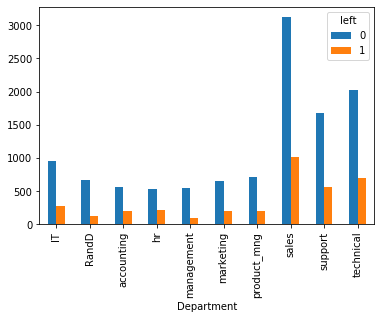

In [136]:
# departmentwise employee retention rate
# visualizing rention rate department wise
pd.crosstab(data_df['Department'],data_df['left']).plot(kind='bar')

## Task 2

## 2. Data Preprocessing 

### Data quality | Missing Value Assessment

In [137]:
# check missing values in data
print(data_df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [138]:

# Converting object data types into categorical column
data_df['salary']=data_df['salary'].astype('category')
data_df['Department']=data_df['Department'].astype('category')

In [139]:
# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data_df['salary_encode']= label_encoder.fit_transform(data_df['salary'])
data_df['salary_encode'].unique()

data_df['Department_encode']= label_encoder.fit_transform(data_df['Department'])
data_df['Department_encode'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

### Data quality  | Detect correlations

In [140]:
# finding correlation
cor=data_df.corr()
cor

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encode,Department_encode
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.011754,0.003153
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.013965,0.007772
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009672,0.009268
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.007082,0.003913
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.003086,-0.018010
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.002506,0.003425
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.001294,0.032105
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.001318,-0.027336
salary_encode,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,1.000000,0.000685
Department_encode,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,0.000685,1.000000


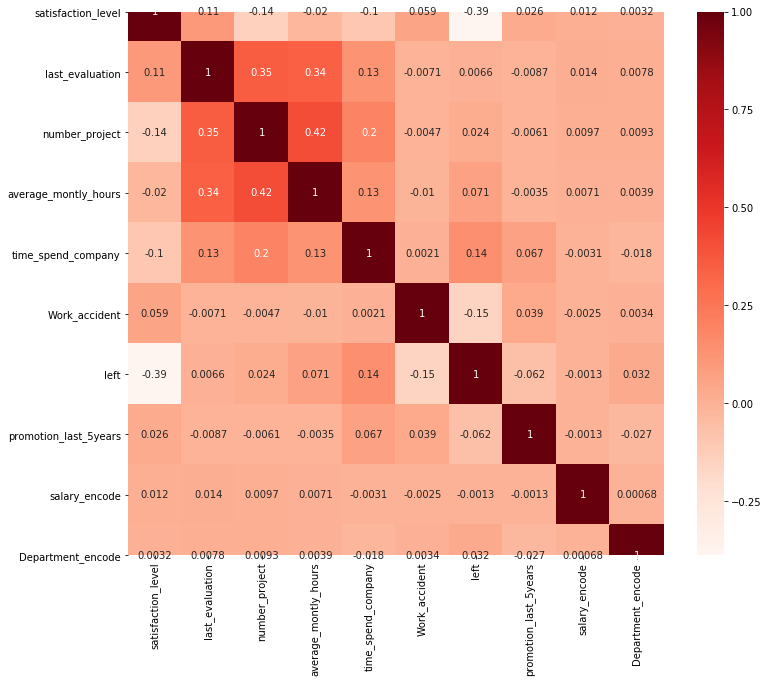

In [141]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [166]:
#Correlation with output variable
cor_target = abs(cor["left"])
print(cor_target)


satisfaction_level       0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident            0.154622
left                     1.000000
promotion_last_5years    0.061788
salary_encode            0.001294
Department_encode        0.032105
Name: left, dtype: float64


Looking at the correlation value, the satisfaction_level is the crucial feature in finding whether the employee leaves the organization

In [143]:
#Selecting highly correlated features with the target variable
relevant_features = cor_target[cor_target>=0.03]
print(relevant_features)

satisfaction_level       0.388375
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident            0.154622
left                     1.000000
promotion_last_5years    0.061788
Department_encode        0.032105
Name: left, dtype: float64


In [144]:
#Creating test and training datasets

#X=data_df[['satisfaction_level','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years', 'Department_encode']]
#y=data_df['left']

X=data_df[['satisfaction_level','last_evaluation','number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years', 'Department_encode','salary_encode']]
y=data_df['left']



x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
print('Size of training dataset: ', x_train.shape)
print('Size of test dataset: ', x_test.shape)

Size of training dataset:  (10499, 9)
Size of test dataset:  (4500, 9)


In [145]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [146]:
y_train.head()

5220    0
4819    0
9065    0
8696    0
5571    0
Name: left, dtype: int64

### Task 3

## Naive Bayes

In [147]:
# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(x_train, y_train) 
print('Training accuracy',classifier.score(x_train,y_train))

Training accuracy 0.7953138394132775


In [148]:
# Predicting the Test set results  

y_pred = classifier.predict(x_test) 
print('Test Accuracy is ', classifier.score(x_test,y_test))


Test Accuracy is  0.802


Factors affecting employee retention can be analyzed by finding the correlation of features


All the varaibles have correlation value < 0.5 with output variable
Hence a threshold of 0.2 is set for feature selection


The relevant features shown above contribute to the classification of the target variable 

In [149]:
# Making the Confusion Matrix  
cm = confusion_matrix(y_test, y_pred)
cm

array([[2794,  607],
       [ 284,  815]])

In [150]:
# Evaluate Accuracy Score
#Accuracy calculated using accuracy_score by giving y_test and y_pred
print('Test Accuracy',accuracy_score(y_test, y_pred))

Test Accuracy 0.802


In [151]:
# Evaluate other metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred,average='weighted'))

accuracy: 0.802
recall: 0.802
f1-score: 0.8097487684098732
precision: 0.8260165477244709


In [152]:
#Calculating roc score
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
roc

0.9719165454468109

In [153]:
# calculate roc curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)
# calculate AUC

AUC: 0.782


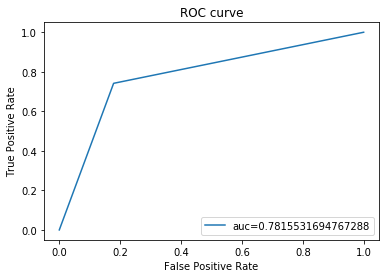

In [154]:
#plotting ROC curve

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()

## Task 4: Modelling using Decision Tree

In [155]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [156]:
# load dataset
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20, random_state = 42)

#Normalizing the data
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

In [157]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(x_train1,y_train1)
#Predict the response for test dataset
y_pred1 = clf.predict(x_test1)

In [158]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9526666666666667


In [159]:
# confusion matrix
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1,y_pred1)

array([[2206,   88],
       [  54,  652]])

In [160]:
# Evaluate other metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', accuracy_score(y_test1, y_pred1))
print('recall:', recall_score(y_test1, y_pred1, average='weighted'))
print('f1-score:', f1_score(y_test1, y_pred1, average='weighted'))
print('precision:', precision_score(y_test1, y_pred1,average='weighted'))

accuracy: 0.9526666666666667
recall: 0.9526666666666667
f1-score: 0.9530464498250896
precision: 0.9537436179542373


In [161]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test1, clf.predict_proba(x_test1)[:,1])
roc

0.967545586342991

In [162]:
# calculate roc curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
# calculate AUC
auc = roc_auc_score(y_test1, y_pred1)
print('AUC: %.3f' % auc)
# calculate AUC


AUC: 0.943


In [ ]:
#plotting ROC curve

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()

Inferences

Naive bayes have Test Accuracy of 80% and
Decision Tress have Test Accuracy of 95%

Considering AUC,
The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

Naive Bayes have AUC value of 0.78 and Naibe Bayes as 0.94

Therefore, we can say DT best models the data and helps in finding employee retention accurately